In [76]:
import pandas as pd
from datetime import timedelta, date

## my personal bank statments, exported as a csv and stored locally on my machine
spending_df = pd.read_csv('~/datasets/bank/spending_15Oct.CSV').set_index('Date')
spending_df = spending_df.drop('Unnamed: 2', 1)
saving_df = pd.read_csv('~/datasets/bank/saving_15Oct.CSV').set_index('Date')
saving_df = saving_df.drop('Unnamed: 2', 1)

In [77]:
print(spending_df.head())
print()
print(saving_df.head())

                                 Description  Delta  Balance
Date                                                        
18 Oct 2018    TRANSFER FROM J D SHEA - 02 ;   20.0    20.73
18 Oct 2018    POS W/D FOUR SQUARE H-16:52 ;  -20.0     0.73
19 Oct 2018    TRANSFER FROM J D SHEA - 02 ;    9.0     9.73
19 Oct 2018  TWL 134 WELLINGTON WELLINGTON ;   -9.0     0.73
26 Oct 2018    TRANSFER FROM J D SHEA - 02 ;   12.0    12.73

                             Description  Delta  Balance
Date                                                    
18 Oct 2018  TRANSFER TO J D SHEA - 01 ;  -20.0   1872.3
19 Oct 2018  TRANSFER TO J D SHEA - 01 ;   -9.0   1863.3
26 Oct 2018  TRANSFER TO J D SHEA - 01 ;  -12.0   1851.3
26 Oct 2018  TRANSFER TO J D SHEA - 01 ;   -3.0   1848.3
31 Oct 2018            INTEREST CREDIT ;    2.0   1850.3


In [78]:
## taken from answer on stackoverflow
## link: https://tinyurl.com/y2ufeqwe 
def daterange(start_date, end_date):
    for n in range(int ((end_date - start_date).days)):
        yield (start_date + timedelta(n)).strftime("%d %b %Y")

In [79]:
print(spending_df['Balance']['18 Oct 2018'])

18 Oct 2018    20.73
18 Oct 2018     0.73
Name: Balance, dtype: float64


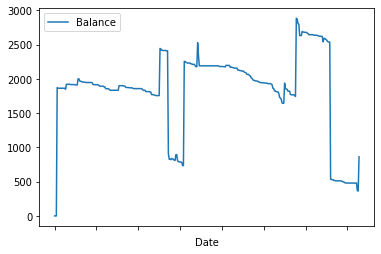

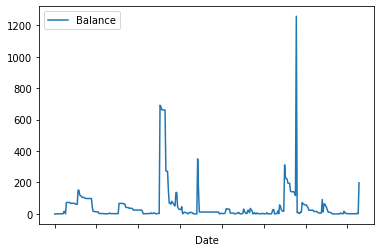

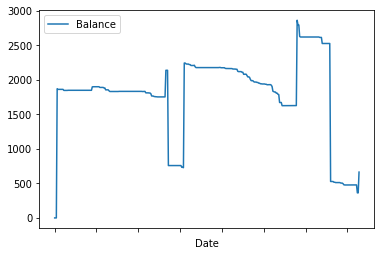

In [80]:
last_spend_bal = 0
spending_balances = []

last_save_bal = 0
saving_balances = []

combined_balances = []

for day in daterange(date(2018, 10, 15), date(2019, 10, 15)):
    try:
        last_save_bal = saving_df['Balance'][day][-1:].item()
    except IndexError:    # occurs when only one transaction has occured that day
        last_save_bal = saving_df['Balance'][day]
    except KeyError:      # occures when no transations have occured that day
        pass
    
    try:
        last_spend_bal = spending_df['Balance'][day][-1:].item()
    except IndexError:    # occurs when only one transaction has occured that day
        last_spend_bal = spending_df['Balance'][day]
    except KeyError:      # occures when no transations have occured that day
        pass
    
    combined_balances.append({'Date': day, 'Balance': (last_spend_bal + last_save_bal)})
    spending_balances.append({'Date': day, 'Balance': last_spend_bal})
    saving_balances.append({'Date': day, 'Balance': last_save_bal})

combined_bal = pd.DataFrame(data=combined_balances).set_index('Date')
saving_bal = pd.DataFrame(data=saving_balances).set_index('Date')
spending_bal = pd.DataFrame(data=spending_balances).set_index('Date')

combined_bal.plot()
spending_bal.plot()
saving_bal.plot()

In [81]:
costs_df = spending_df[spending_df['Delta'] < 0]
costs_df = costs_df[costs_df['Description'].str.startswith('TRANSFER') == False]

-11.086277056277055


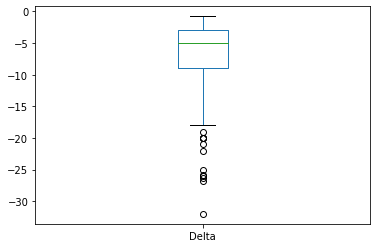

In [82]:
print(costs_df['Delta'].mean())
costs_df[costs_df['Delta'] > -40]['Delta'].plot(kind='box')

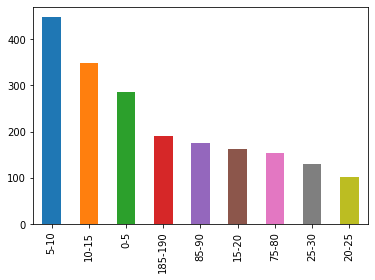

In [83]:
from math import floor
fives = []
for c in costs_df['Delta']:
    while len(fives) <= floor(-c/5):
        fives.append(0)
    fives[floor(-c/5)] += -c 
    
labeled_fives = {}
for (i, f) in enumerate(fives):
    if f < 100:
        pass
    else:
        labeled_fives[f'{i*5}-{(i+1)*5}'] = f
        
labels = [k for k in sorted(labeled_fives, key=labeled_fives.get, reverse=True)]
costs_r5 = pd.Series(data=[labeled_fives[k] for k in labels], index=labels)
costs_r5.plot(kind='bar')